In [ ]:
import pandas as pd    # Data manipulation
import numpy as np    # Numerical
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Visualization

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving WorldBank Renewable Energy Consumption_WorldBank Renewable Energy Consumption.csv to WorldBank Renewable Energy Consumption_WorldBank Renewable Energy Consumption (2).csv


In [ ]:
df= pd.read_csv('WorldBank Renewable Energy Consumption_WorldBank Renewable Energy Consumption.csv')

**EDA**

In [ ]:
df.head(5)

,Country Code,Country Name,Income Group,Indicator Code,Indicator Name,Region,Year,Energy Consump.
0,ABW,Aruba,High income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Latin America & Caribbean,1/1/1990,0.268747
1,AFG,Afghanistan,Low income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,South Asia,1/1/1990,15.924532
2,AGO,Angola,Lower middle income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Sub-Saharan Africa,1/1/1990,72.255252
3,ALB,Albania,Upper middle income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Europe & Central Asia,1/1/1990,25.518088
4,AND,Andorra,High income,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,Europe & Central Asia,1/1/1990,14.273550


In [ ]:
df.shape

(6071, 8)

In [ ]:
x= df.columns
for i in x:
  print(i)

Country Code
Country Name
Income Group
Indicator Code
Indicator Name
Region
Year
Energy Consump.


In [ ]:
df.isnull().sum()

Country Code       0
Country Name       0
Income Group       0
Indicator Code     0
Indicator Name     0
Region             0
Year               0
Energy Consump.    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6071 entries, 0 to 6070
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Code     6071 non-null   object 
 1   Country Name     6071 non-null   object 
 2   Income Group     6071 non-null   object 
 3   Indicator Code   6071 non-null   object 
 4   Indicator Name   6071 non-null   object 
 5   Region           6071 non-null   object 
 6   Year             6071 non-null   object 
 7   Energy Consump.  6071 non-null   float64
dtypes: float64(1), object(7)
memory usage: 379.6+ KB


In [ ]:
# Converting object year into Date to datatype
df['Year']= pd.to_datetime(df['Year'])

In [ ]:
categorical_column= []
non_categorical_column=[]
for column in df.columns:
  if df[column].dtype=='object'or df[column].dtype=='category':
    categorical_column.append(column)
  else:
      non_categorical_column.append(column)
print(categorical_column)
print(non_categorical_column)

['Country Code', 'Country Name', 'Income Group', 'Indicator Code', 'Indicator Name', 'Region']
['Year', 'Energy Consump.']


In [ ]:
# Checking for statistical
df.describe()

,Year,Energy Consump.
count,6071,6071.000000
mean,2004-03-05 09:25:42.348871552,30.467386
min,1990-01-01 00:00:00,0.000000
25%,1997-01-01 00:00:00,3.272610
50%,2004-01-01 00:00:00,18.901600
75%,2011-01-01 00:00:00,52.666149
max,2018-01-01 00:00:00,98.342903
std,NaN,30.688168


In [ ]:
# Checking and cleaning outliers  (Why are we checking? Is to get Over Fiting/Under Fitting and To check for skweness)
def clean_outliers(column):
  Q1= df[column].quantile(0.25)   # First quantile range
  Q3= df[column].quantile(0.75)
  IQR= Q3-Q1     # Inter quantile range (IQR)
  lower_limit= Q1-1.5*IQR
  upper_limit= Q3+1.5*IQR
  return df[(df['Energy Consump.'] > lower_limit) & (df['Energy Consump.'] < upper_limit)]


In [ ]:
new_df= clean_outliers(column)
print(new_df)

     Country Code       Country Name         Income Group  Indicator Code  \
0             ABW              Aruba          High income  EG.FEC.RNEW.ZS   
1             AFG        Afghanistan           Low income  EG.FEC.RNEW.ZS   
2             AGO             Angola  Lower middle income  EG.FEC.RNEW.ZS   
3             ALB            Albania  Upper middle income  EG.FEC.RNEW.ZS   
4             AND            Andorra          High income  EG.FEC.RNEW.ZS   
...           ...                ...                  ...             ...   
6066          GNQ  Equatorial Guinea  Upper middle income  EG.FEC.RNEW.ZS   
6067          GAB              Gabon  Upper middle income  EG.FEC.RNEW.ZS   
6068          MUS          Mauritius  Upper middle income  EG.FEC.RNEW.ZS   
6069          NAM            Namibia  Upper middle income  EG.FEC.RNEW.ZS   
6070          ZAF       South Africa  Upper middle income  EG.FEC.RNEW.ZS   

                                         Indicator Name  \
0     Renewable 

In [ ]:
new_df.drop(['Country Code'], axis =1, inplace=True)

**Visualization**

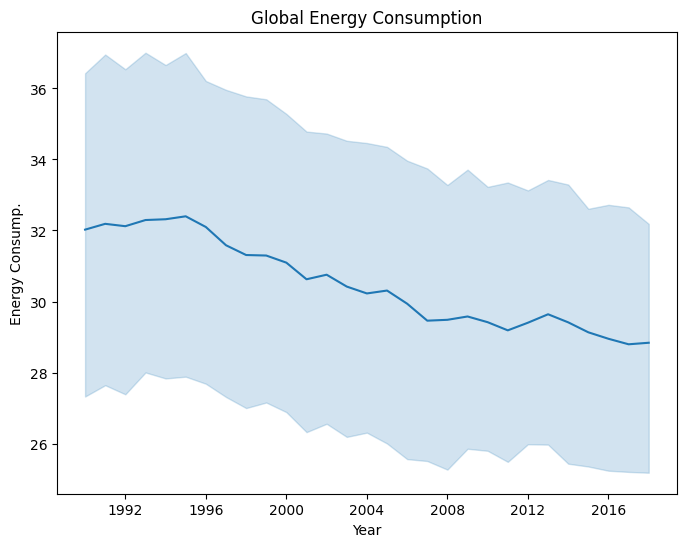

In [ ]:
# Global energy consumption energy time
plt.figure(figsize=(8,6))
sns.lineplot(x='Year', y='Energy Consump.', data=new_df)
plt.title('Global Energy Consumption')
plt.xlabel('Year')
plt.ylabel('Energy Consump.')
plt.show()

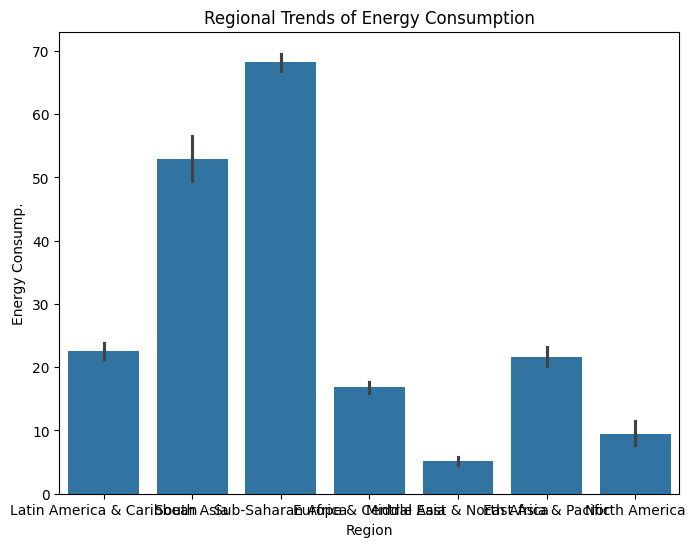

In [ ]:
# Regional trends of energy consumption
plt.figure(figsize=(8,6))
sns.barplot(x='Region', y='Energy Consump.', data=new_df)
plt.title('Regional Trends of Energy Consumption')
plt.xlabel('Region')
plt.ylabel('Energy Consump.')
plt.show()

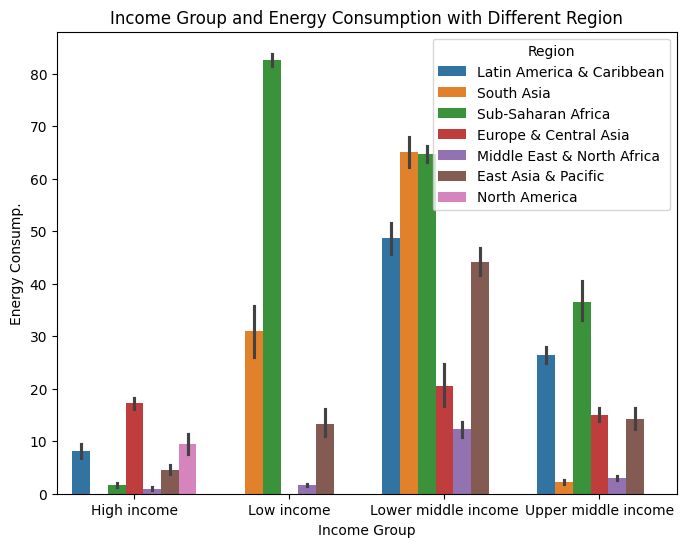

In [ ]:
# Income group and energy consumption with diffrent reagion
plt.figure(figsize= (8,6))
sns.barplot(x='Income Group', y='Energy Consump.', hue='Region', data=new_df)
plt.title('Income Group and Energy Consumption with Different Region')
plt.xlabel('Income Group')
plt.ylabel('Energy Consump.')
plt.show()


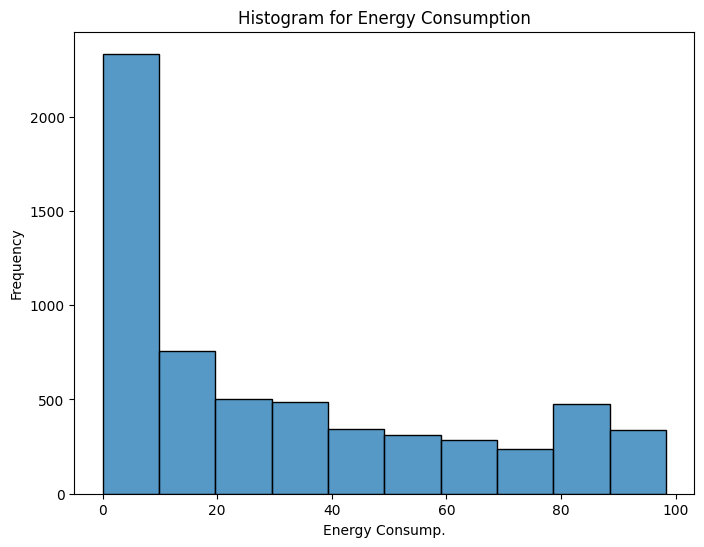

In [ ]:
# Histogram for energy consumption
plt.figure(figsize=(8,6))
sns.histplot(new_df['Energy Consump.'], bins=10)
plt.title('Histogram for Energy Consumption')
plt.xlabel('Energy Consump.')
plt.ylabel('Frequency')
plt.show()

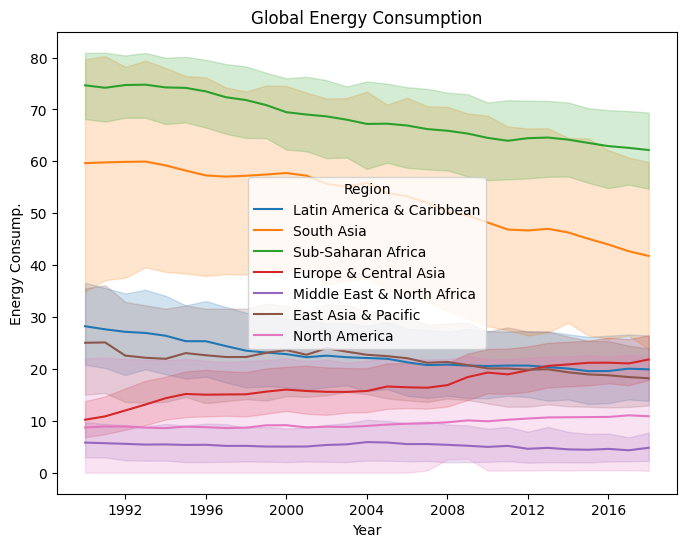

In [ ]:
# LIne graph
plt.figure(figsize=(8,6))
sns.lineplot(x='Year', y='Energy Consump.', hue= 'Region', data=new_df)
plt.title('Global Energy Consumption')
plt.xlabel('Year')
plt.ylabel('Energy Consump.')
plt.show()

In [ ]:
# Analysing label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() # To encode categorical variables because computers does not understand stringes
new_df['Country Name']= le.fit_transform(new_df['Country Name'])
new_df['Indicator Name']= le.fit_transform(new_df['Indicator Name'])
new_df['Region']= le.fit_transform(new_df['Region'])
new_df['Income Group']= le.fit_transform(new_df['Income Group'])
new_df['Indicator Code']= le.fit_transform(new_df['Indicator Code'])
new_df['Year']= le.fit_transform(new_df['Year'])
new_df.head()

,Country Name,Income Group,Indicator Code,Indicator Name,Region,Year,Energy Consump.
0,9,0,0,0,2,0,0.268747
1,0,1,0,0,5,0,15.924532
2,5,2,0,0,6,0,72.255252
3,1,3,0,0,1,0,25.518088
4,4,0,0,0,1,0,14.273550


                 Income Group    Region  Energy Consump.  Country Name
Income Group         1.000000  0.106657         0.168028     -0.036759
Region               0.106657  1.000000         0.598877     -0.052049
Energy Consump.      0.168028  0.598877         1.000000     -0.036231
Country Name        -0.036759 -0.052049        -0.036231      1.000000


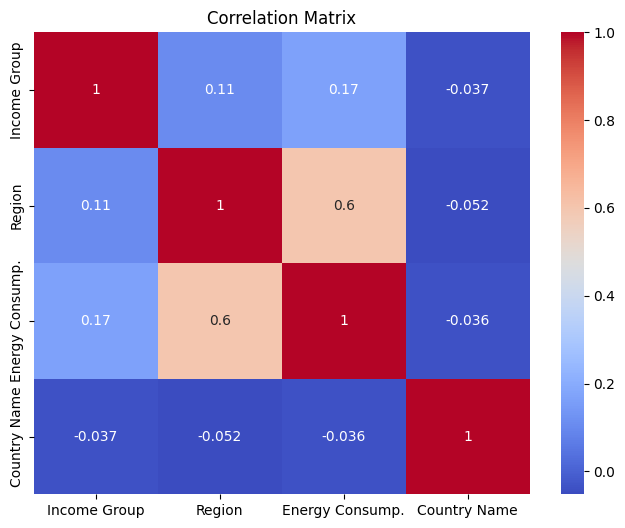

In [ ]:
# Checking for correlarion matrix
corr_data= new_df[['Income Group', 'Region', 'Energy Consump.', 'Country Name']]
corr_matrix= corr_data.corr()
print(corr_matrix)

# Creating Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Comment here Correlation**

-The relationship between for Energy consumption and income group is weak 0.17

-The relationship between for Energy consumption and Region Strong postivi relationship and its 0.6

-The raltionship between Energy consumption and Country name is weak negative relationship and its -0.036

**Mechine Learning**

Our target variable is Energy Consump because we need to confirm how is being affected by other factors like (Country Code,Country Name,Income Group,Indicator Code,Indicator Name,Region)

**Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split   # Spliting to dataset and training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error # To check accuracy and mean squared error

In [ ]:
# Feature Engineering
x= new_df.drop(['Energy Consump.'], axis=1)
y= new_df['Energy Consump.'] # Target variable

In [ ]:
# Split data training and testing
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
# Creating variable name for our model
model= LinearRegression()

In [ ]:
# Fitting model into Data
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predictions on test size
y_pred= model.predict(x_test)

In [ ]:
# Evaluating and Calculating for accurace (To know accuracy score for your model/Linear mechine model)
mse= mean_squared_error(y_test, y_pred)  # The average errors we experienced
r2= r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('acuracy', r2)

Mean Squared Error: 566.6497945268428
acuracy 0.3908013088930776


**DECISSION TREES**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

model= DecisionTreeRegressor(random_state=42)

#Train the model
model.fit(x_train, y_train)

# Predictions on test size
y_pred= model.predict(x_test)

# Evaluate and calculate the accuracy
mse= mean_squared_error(y_test, y_pred)  # The average errors we experienced
r2= r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('acuracy', r2)


Mean Squared Error: 5.620339694364942
acuracy 0.9939576372947556


**RANDOM FOREST**

Is a collection of many decision Trees collecting together

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Model
model= RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
model.fit(x_train, y_train)

# Predictions on test size
y_pred= model.predict(x_test)

#Evaluate the model
mse= mean_squared_error(y_test, y_pred)  # The average errors we experienced
r2= r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('acuracy', r2)



Mean Squared Error: 3.619261721827996
acuracy 0.9961089732582502
